In [1]:
#My imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
import scipy.stats as stats

In [2]:
#read data into a dataframe
df = pd.read_csv('257k-gaiadr2-sources-with-photometry.csv')

In [3]:
df.shape

(257292, 36)

In [4]:
df.describe()

,source_id,parallax,parallax_error,phot_g_mean_mag,phot_rp_mean_mag,phot_bp_mean_mag,phot_g_mean_flux_error,ra,dec,ra_error,...,gsc23_b_mag,ppmxl_b1mag,ppmxl_b2mag,ppmxl_r1mag,ppmxl_imag,tmass_j_m,tmass_h_m,tmass_ks_m,tycho2_bt_mag,tycho2_vt_mag
count,2.572920e+05,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,...,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000,257292.000000
mean,3.527893e+18,3.867620,0.027311,10.985408,10.512574,11.325046,408.566694,187.411543,0.263453,0.021092,...,11.889494,11.216760,11.746407,10.937099,11.116472,9.959226,9.672489,9.602929,11.891477,11.198379
std,1.900065e+18,2.585082,0.004440,0.926037,0.921731,0.927871,974.266511,102.379247,52.306217,0.004364,...,0.979089,0.999315,0.948081,0.966935,0.927484,0.947377,0.976874,0.989568,0.975233,0.925193
min,5.506535e+14,2.000002,0.014167,5.846839,4.985867,6.113017,14.343370,0.001565,-89.877605,0.008949,...,0.000000,6.010000,6.230000,4.460000,6.010000,3.466000,2.507000,2.135000,6.210000,6.040000
25%,1.851746e+18,2.448982,0.023751,10.467593,10.013630,10.787218,107.738958,97.762747,-49.009828,0.018013,...,11.329000,10.600000,11.190000,10.410000,10.580000,9.485000,9.204000,9.131000,11.330000,10.665000
50%,3.379647e+18,3.099492,0.027284,11.172445,10.697459,11.514727,253.327215,185.169200,5.448580,0.020611,...,12.007000,11.380000,11.880000,11.130000,11.280000,10.150000,9.874000,9.808000,12.007000,11.371000
75%,5.316814e+18,4.327310,0.031061,11.675067,11.191143,12.020231,419.064591,280.945441,48.930012,0.023715,...,12.571000,11.960000,12.430000,11.650000,11.790000,10.641000,10.367000,10.304000,12.571000,11.874000
max,6.916901e+18,154.470961,0.035000,13.064554,12.738400,13.425719,145694.885684,359.997351,89.729274,0.070815,...,16.503000,15.040000,15.620000,13.930000,14.290000,12.758000,12.409000,12.264000,16.503000,14.240000


In [5]:
df.values

array([[5781834812959489920, '9429-344-1', 7.674512166001468, ..., 8.849,
        10.869, 10.267],
       [6680681063238358528, '7953-1368-1', 3.206302268186413, ...,
        10.715, 12.948, 12.386],
       [2065107828836604672, '3171-1265-1', 3.1012801587542222, ...,
        10.113, 11.817, 11.389],
       ...,
       [2021662241799603584, '2143-1296-1', 4.142171915198329, ...,
        10.363, 13.055, 12.177],
       [5408432177312924160, '8182-751-1', 2.0280128561972, ..., 10.228,
        11.571, 11.037],
       [5781847766580979968, '9272-329-1', 3.225143556627833, ...,
        10.784, 12.967, 12.605]], dtype=object)

In [6]:
df

,source_id,tycho2_id,parallax,parallax_error,phot_g_mean_mag,phot_rp_mean_mag,phot_bp_mean_mag,phot_g_mean_flux_error,ra,dec,...,gsc23_b_mag,ppmxl_b1mag,ppmxl_b2mag,ppmxl_r1mag,ppmxl_imag,tmass_j_m,tmass_h_m,tmass_ks_m,tycho2_bt_mag,tycho2_vt_mag
0,5781834812959489920,9429-344-1,7.674512,0.023794,10.113231,9.665930,10.429392,640.523864,236.645693,-75.399888,...,10.869,10.71,10.76,10.13,10.19,9.185,8.914,8.849,10.869,10.267
1,6680681063238358528,7953-1368-1,3.206302,0.034306,12.095904,11.610787,12.430636,51.163714,307.362343,-40.700107,...,12.948,12.66,12.86,11.98,12.32,11.067,10.790,10.715,12.948,12.386
2,2065107828836604672,3171-1265-1,3.101280,0.026206,11.209872,10.816037,11.472557,235.630098,313.225036,40.417739,...,11.817,11.38,11.61,11.53,11.27,10.421,10.161,10.113,11.817,11.389
3,5408451075170077696,8182-1948-1,3.079357,0.030235,11.566668,11.076862,11.910268,136.654106,151.755425,-46.530993,...,12.437,12.29,12.28,11.70,11.57,10.501,10.191,10.101,12.437,11.655
4,5781851958469443584,9429-1241-1,3.225426,0.026983,12.487245,11.960208,12.863915,53.066279,235.555713,-75.457647,...,13.550,13.05,13.41,12.55,12.77,11.344,11.005,10.966,13.550,12.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257287,1872324163000156928,3172-18-1,2.641002,0.031080,10.175580,9.727876,10.489610,322.859786,315.841812,39.480764,...,10.986,9.71,10.90,10.30,10.32,9.197,8.904,8.859,10.986,10.408
257288,4464110774635394816,1506-1123-1,3.625197,0.032211,10.177145,9.820449,10.409614,365.287764,246.130685,15.082893,...,10.771,10.11,10.71,10.08,10.24,9.420,9.213,9.171,10.771,10.279
257289,2021662241799603584,2143-1296-1,4.142172,0.034090,11.908316,11.385008,12.285282,62.188565,295.359767,25.437829,...,13.055,12.21,12.86,12.14,12.09,10.757,10.435,10.363,13.055,12.177
257290,5408432177312924160,8182-751-1,2.028013,0.030436,11.045909,10.751245,11.233594,418.495794,151.293381,-46.796695,...,11.571,11.55,11.47,11.16,10.95,10.434,10.291,10.228,11.571,11.037


In [7]:
#Drop irrelevant columns
X = df.drop(columns=["phot_g_mean_mag", "tycho2_id", "source_id"])
X

,parallax,parallax_error,phot_rp_mean_mag,phot_bp_mean_mag,phot_g_mean_flux_error,ra,dec,ra_error,dec_error,l,...,gsc23_b_mag,ppmxl_b1mag,ppmxl_b2mag,ppmxl_r1mag,ppmxl_imag,tmass_j_m,tmass_h_m,tmass_ks_m,tycho2_bt_mag,tycho2_vt_mag
0,7.674512,0.023794,9.665930,10.429392,640.523864,236.645693,-75.399888,0.018643,0.019501,313.398087,...,10.869,10.71,10.76,10.13,10.19,9.185,8.914,8.849,10.869,10.267
1,3.206302,0.034306,11.610787,12.430636,51.163714,307.362343,-40.700107,0.026077,0.017956,0.579820,...,12.948,12.66,12.86,11.98,12.32,11.067,10.790,10.715,12.948,12.386
2,3.101280,0.026206,10.816037,11.472557,235.630098,313.225036,40.417739,0.019531,0.020901,81.813395,...,11.817,11.38,11.61,11.53,11.27,10.421,10.161,10.113,11.817,11.389
3,3.079357,0.030235,11.076862,11.910268,136.654106,151.755425,-46.530993,0.023936,0.024509,275.790839,...,12.437,12.29,12.28,11.70,11.57,10.501,10.191,10.101,12.437,11.655
4,3.225426,0.026983,11.960208,12.863915,53.066279,235.555713,-75.457647,0.020832,0.019828,313.139319,...,13.550,13.05,13.41,12.55,12.77,11.344,11.005,10.966,13.550,12.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257287,2.641002,0.031080,9.727876,10.489610,322.859786,315.841812,39.480764,0.021419,0.027934,82.409520,...,10.986,9.71,10.90,10.30,10.32,9.197,8.904,8.859,10.986,10.408
257288,3.625197,0.032211,9.820449,10.409614,365.287764,246.130685,15.082893,0.020600,0.014097,30.585648,...,10.771,10.11,10.71,10.08,10.24,9.420,9.213,9.171,10.771,10.279
257289,4.142172,0.034090,11.385008,12.285282,62.188565,295.359767,25.437829,0.018715,0.026058,61.064789,...,13.055,12.21,12.86,12.14,12.09,10.757,10.435,10.363,13.055,12.177
257290,2.028013,0.030436,10.751245,11.233594,418.495794,151.293381,-46.796695,0.025054,0.025297,275.692078,...,11.571,11.55,11.47,11.16,10.95,10.434,10.291,10.228,11.571,11.037


In [8]:
#Prediction vector
y = df['phot_g_mean_mag']
y

0         10.113231
1         12.095904
2         11.209872
3         11.566668
4         12.487245
            ...    
257287    10.175580
257288    10.177145
257289    11.908316
257290    11.045909
257291    12.268248
Name: phot_g_mean_mag, Length: 257292, dtype: float64

In [9]:
#Check to see if there are any null values in our input matrix
X.isnull().sum()

parallax                  0
parallax_error            0
phot_rp_mean_mag          0
phot_bp_mean_mag          0
phot_g_mean_flux_error    0
ra                        0
dec                       0
ra_error                  0
dec_error                 0
l                         0
b                         0
pmra                      0
pmdec                     0
allwise_ang_dist          0
gsc23_ang_dist            0
ppmxl_ang_dist            0
tmass_ang_dist            0
tycho2_ang_dist           0
allwise_w1                0
allwise_w2                0
allwise_w3                0
allwise_w4                0
gsc23_v_mag               0
gsc23_b_mag               0
ppmxl_b1mag               0
ppmxl_b2mag               0
ppmxl_r1mag               0
ppmxl_imag                0
tmass_j_m                 0
tmass_h_m                 0
tmass_ks_m                0
tycho2_bt_mag             0
tycho2_vt_mag             0
dtype: int64

In [10]:
#Splitting data into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [11]:
#Linear regression model
lr = LinearRegression()

In [12]:
#Fitting data into the model
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
#Checking intercept bound
c = lr.intercept_

In [14]:
c

-0.007717653311965833

In [15]:
m = lr.coef_
m

array([-1.85300531e-04,  7.17496772e-02,  4.62134919e-01,  5.29594575e-01,
       -4.12717952e-07,  1.85293345e-07, -9.64116937e-06, -3.66389822e-02,
       -1.85181668e-01, -2.60211985e-06,  3.42485611e-06,  3.30756980e-06,
       -5.94849956e-06,  1.25409747e-02, -5.94257076e-03, -1.13634375e-03,
        4.84705529e-03,  5.96615677e-03,  1.38389178e-02, -1.58940770e-02,
        9.71371319e-04,  3.55990622e-04, -9.24897600e-03, -1.94137132e-03,
       -4.72749577e-04,  1.06374834e-02, -2.64866535e-03, -6.15721613e-03,
        1.93542087e-02, -3.25640689e-02,  3.49171999e-02, -9.45566632e-03,
        1.36040272e-02])

In [16]:
#Predicting our training data
y_pred_train = lr.predict(X_train)

In [17]:
y_pred_train

array([ 8.99756571, 10.01232173, 12.12184204, ..., 10.84211917,
       12.1926058 , 12.04205557])

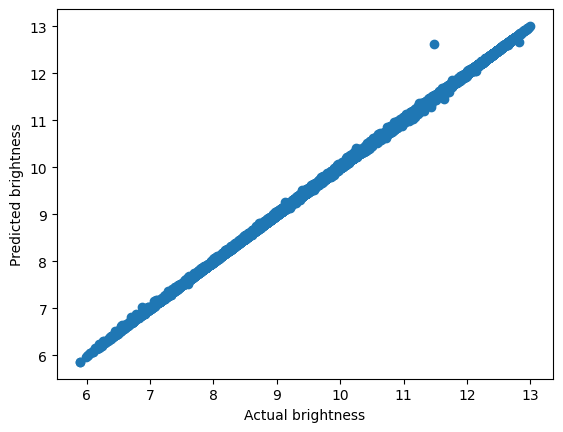

In [18]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

In [20]:
#Predicting our test set
y_pred_test = lr.predict(X_test)

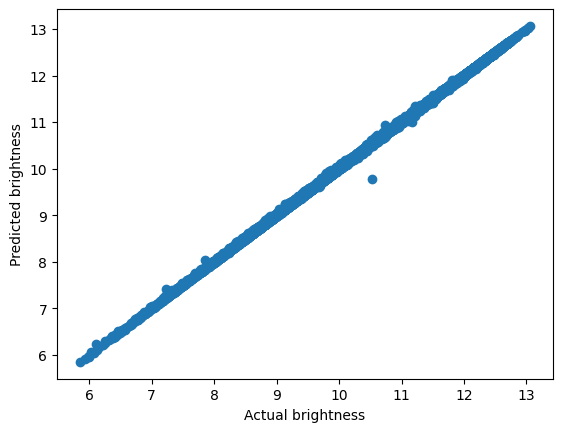

In [21]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

In [23]:
#loss functions (not much loss here!)
MSE = mean_squared_error(y_test, y_pred_test)
MAE = mean_absolute_error(y_test, y_pred_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
MAPE


0.00042218276429515636

In [23]:
#Applied science part. Our null hypothesis is that the observed and expected frequencies have NO SIGNIFICANT DIFFERENCE
#Pearson's correlation test
r2_score(y_test, y_pred_test)
#The high correlation means the prediction and the actual frequencies are similar, which is what we want. Hence we accept the null hypothesis

0.9999286563355192

In [24]:
#The F test
F = (np.var(y_pred_test))/(np.var(y_test))
F
#Our F value is less than 1 and that of 32 DoF, with apha = 0.05. Once again, this means we can accept our null hypothesis

0.9999634387091962